In [1]:
from nilmtk.api import API
import warnings

warnings.filterwarnings("ignore")
from nilmtk.disaggregate import AttentionCNN

In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import pytorch_lightning as pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# from src import *

USE_GPU = True
device = torch.device("cuda:0" if USE_GPU and torch.cuda.is_available() else "cpu")
print(torch.__version__, pl.__version__, device)

2.0.1 2.0.4 cuda:0


AttentionCNN
Started training for  AttentionCNN
Joint training for  AttentionCNN
............... Loading Data for training ...................
Loading data for  ukdale  dataset
Loading building ...  1
Dropping missing values
Train Jointly
Loading building ...  2
Dropping missing values
Train Jointly
Loading building ...  5
Dropping missing values
Train Jointly
...............AttentionCNN partial_fit running...............
First model training for  fridge
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
     ConstantPad1d-1               [-1, 1, 490]               0
            Conv1d-2              [-1, 30, 481]             330
              ReLU-3              [-1, 30, 481]               0
     ConstantPad1d-4              [-1, 30, 488]               0
            Conv1d-5              [-1, 30, 481]           7,230
              ReLU-6              [-1, 30, 481]               0
     ConstantPad1d-7        

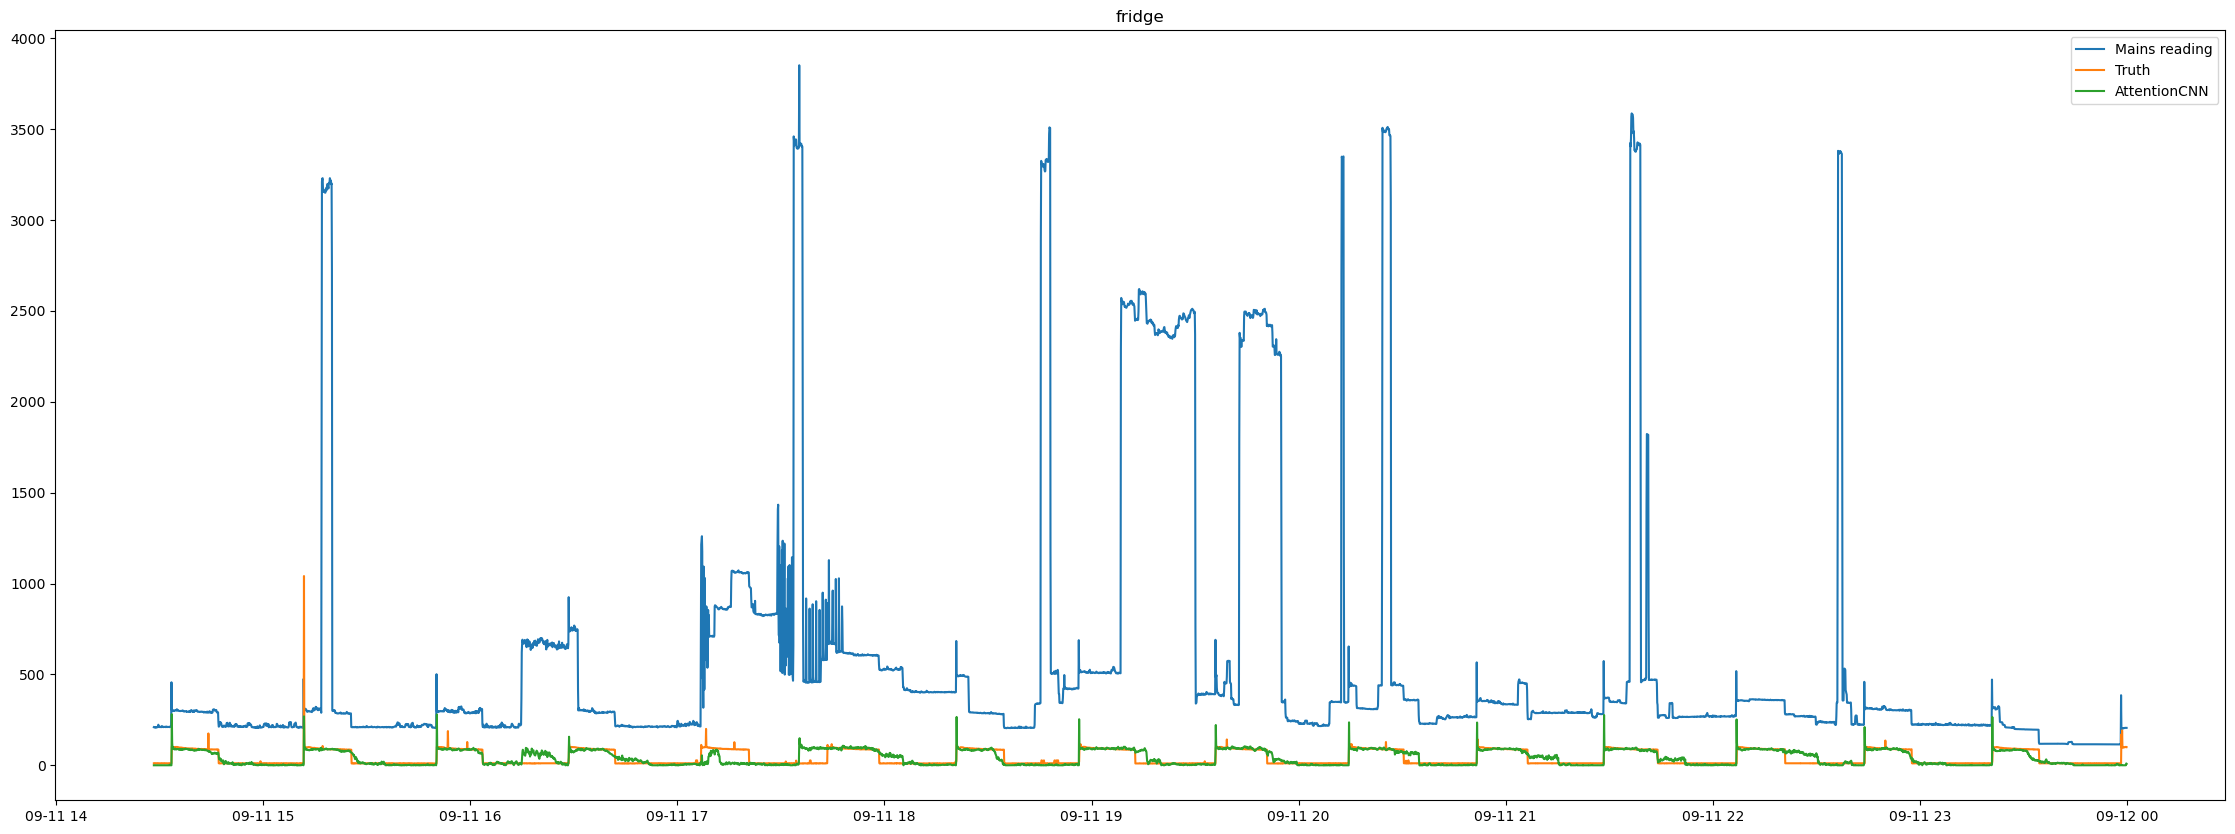

In [3]:
e = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        'mains': ['active'],
        # 'appliance': ['active']
        # 'mains': ['apparent'],  # problem: ukdale active, redd apparent
        'appliance': ['active']
    },
    'sample_rate': 6,
    'appliances': ['fridge'],
    # 'appliances': ['washing machine'],
    # Universally no pre-training
    'pre_trained': False,
    # Specify algorithm hyper-parameters
    'methods': {"AttentionCNN": AttentionCNN(
        {'n_epochs': 10, 'batch_size': 64, 'sequence_length': 481})},
    # Specify train and test data
    'train': {
        'datasets': {
            'ukdale': {
                'path': 'mnt/ukdale.h5',
                'buildings': {
                    1: {
                        'start_time': '2013-05-31',
                        'end_time': '2014-05-31'
                    },
                    2: {
                        'start_time': '2013-05-22',
                        'end_time': '2013-08-01'
                    },
                    5: {
                        'start_time': '2014-07-01',
                        'end_time': '2014-09-05'
                    },
                }
            },
        }
    },
    'test': {
        'datasets': {
            'ukdale': {
              'path': 'mnt/ukdale.h5',
              'buildings': {
                    2: {
                          'start_time': '2013-09-10 00:00',
                          'end_time': '2013-09-12 00:00'
                    }
                }
              },
        },
        # Specify evaluation metrics
        'metrics': ['mae', 'f1score', 'recall', 'precision', 'nep', 'omae', 'MCC']
    }
}

API(e)